In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Dheeraj\Downloads\train_data.csv")

In [3]:
df.shape

(74795, 37)

In [4]:
df.head()

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.61,0.18,5.63,NaN,...,0.384615,inf,49.0,JAVA,large,NaN,1,0.228319,1.0,4
1,77265,85293,4,4,1.0,3321,13848.57,0.06,15.44,10.91,...,0.826087,inf,64.0,Ruby,Medium,Library,8,0.792022,1.0,6
2,62215,14,2,1,2.0,35,151.27,0.14,7.31,19.75,...,0.590909,inf,70.0,ruby,Large,Desktop Application,3,0.725787,5.0,4
3,11168,19,3,1,3.0,38,NaN,0.13,7.5,21.51,...,0.652174,5.5,NaN,Python,Large,Desktop Application,30,3.532268,0.0,10
4,45035,8,3,1,1.0,24,98.10,0.11,9.9,8.40,...,0.846154,inf,216.0,Python,Small,NaN,16,0.732659,NaN,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74795 entries, 0 to 74794
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               74795 non-null  int64  
 1   McCabeLineCount                  74795 non-null  int64  
 2   McCabeCyclomaticComplexity       74795 non-null  int64  
 3   McCabeEssentialComplexity        74795 non-null  int64  
 4   McCabeDesignComplexity           58467 non-null  float64
 5   HalsteadTotalOperatorsOperands   74795 non-null  int64  
 6   HalsteadVolume                   61077 non-null  float64
 7   HalsteadProgramLength            74795 non-null  float64
 8   HalsteadDifficulty               67253 non-null  object 
 9   HalsteadIntelligence             69354 non-null  float64
 10  HalsteadEffort                   74795 non-null  float64
 11  HalsteadB                        74795 non-null  float64
 12  HalsteadTimeEstima

In [6]:
# dropping id column
df.drop(df.columns[0],axis=1,inplace=True)

In [7]:
df.isnull().sum()

McCabeLineCount                        0
McCabeCyclomaticComplexity             0
McCabeEssentialComplexity              0
McCabeDesignComplexity             16328
HalsteadTotalOperatorsOperands         0
HalsteadVolume                     13718
HalsteadProgramLength                  0
HalsteadDifficulty                  7542
HalsteadIntelligence                5441
HalsteadEffort                         0
HalsteadB                              0
HalsteadTimeEstimator              13856
HalsteadLineCountCode               6229
HalsteadLineCountComment               0
HalsteadLineCountBlank             14139
HalsteadLineCountCodeAndComment     4537
UniqueOperators                    10698
UniqueOperands                         0
TotalOperators                     12735
TotalOperands                          0
BranchCount                            0
defects                                0
CodeDensity                         5712
OperatorToOperandRatio             17436
CommentDensity  

<Axes: >

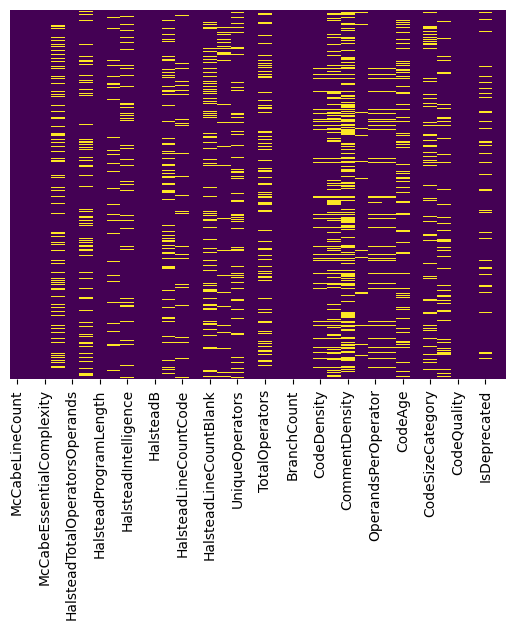

In [8]:
# visualizing missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [9]:
df.nunique()

McCabeLineCount                      577
McCabeCyclomaticComplexity           159
McCabeEssentialComplexity            152
McCabeDesignComplexity               132
HalsteadTotalOperatorsOperands      1665
HalsteadVolume                      6904
HalsteadProgramLength                172
HalsteadDifficulty                  4101
HalsteadIntelligence                9800
HalsteadEffort                     14893
HalsteadB                            706
HalsteadTimeEstimator              12595
HalsteadLineCountCode                741
HalsteadLineCountComment             200
HalsteadLineCountBlank               155
HalsteadLineCountCodeAndComment       62
UniqueOperators                       99
UniqueOperands                       516
TotalOperators                      1321
TotalOperands                       1268
BranchCount                          379
defects                                2
CodeDensity                         3283
OperatorToOperandRatio              7683
CommentDensity  

In [10]:
df["HalsteadDifficulty"] = df["HalsteadDifficulty"].astype(float)
df["HalsteadLineCountBlank"] = df["HalsteadLineCountBlank"].astype(float)
df["UniqueOperators"] = df["UniqueOperators"].astype(float)
df["OperatorToOperandRatio"] = df["OperatorToOperandRatio"].astype(float)
df["ComplexityEfficiency"] = df["ComplexityEfficiency"].astype(float)

In [11]:
print(df.dtypes)

McCabeLineCount                      int64
McCabeCyclomaticComplexity           int64
McCabeEssentialComplexity            int64
McCabeDesignComplexity             float64
HalsteadTotalOperatorsOperands       int64
HalsteadVolume                     float64
HalsteadProgramLength              float64
HalsteadDifficulty                 float64
HalsteadIntelligence               float64
HalsteadEffort                     float64
HalsteadB                          float64
HalsteadTimeEstimator              float64
HalsteadLineCountCode              float64
HalsteadLineCountComment             int64
HalsteadLineCountBlank             float64
HalsteadLineCountCodeAndComment    float64
UniqueOperators                    float64
UniqueOperands                       int64
TotalOperators                     float64
TotalOperands                        int64
BranchCount                          int64
defects                               bool
CodeDensity                        float64
OperatorToO

In [12]:
categorical_cols=["defects","CodeLanguage","CodeSizeCategory","CodeType"]
numerical_cols=["McCabeLineCount","McCabeCyclomaticComplexity","McCabeEssentialComplexity","McCabeDesignComplexity","HalsteadTotalOperatorsOperands","HalsteadVolume","HalsteadProgramLength","HalsteadDifficulty","HalsteadIntelligence","HalsteadEffort","HalsteadB","HalsteadTimeEstimator","HalsteadLineCountCode","HalsteadLineCountComment","HalsteadLineCountBlank","HalsteadLineCountCodeAndComment","UniqueOperators","UniqueOperands","TotalOperators","TotalOperands","BranchCount","CodeDensity","OperatorToOperandRatio","CommentDensity","ComplexityEfficiency","OperandsPerOperator","CodeAndCommentRatio", "CodeAge","CodeQuality","QualityScore","IsDeprecated","TeamSize"]

In [13]:
print(len(categorical_cols))
print(len(numerical_cols))

4
32


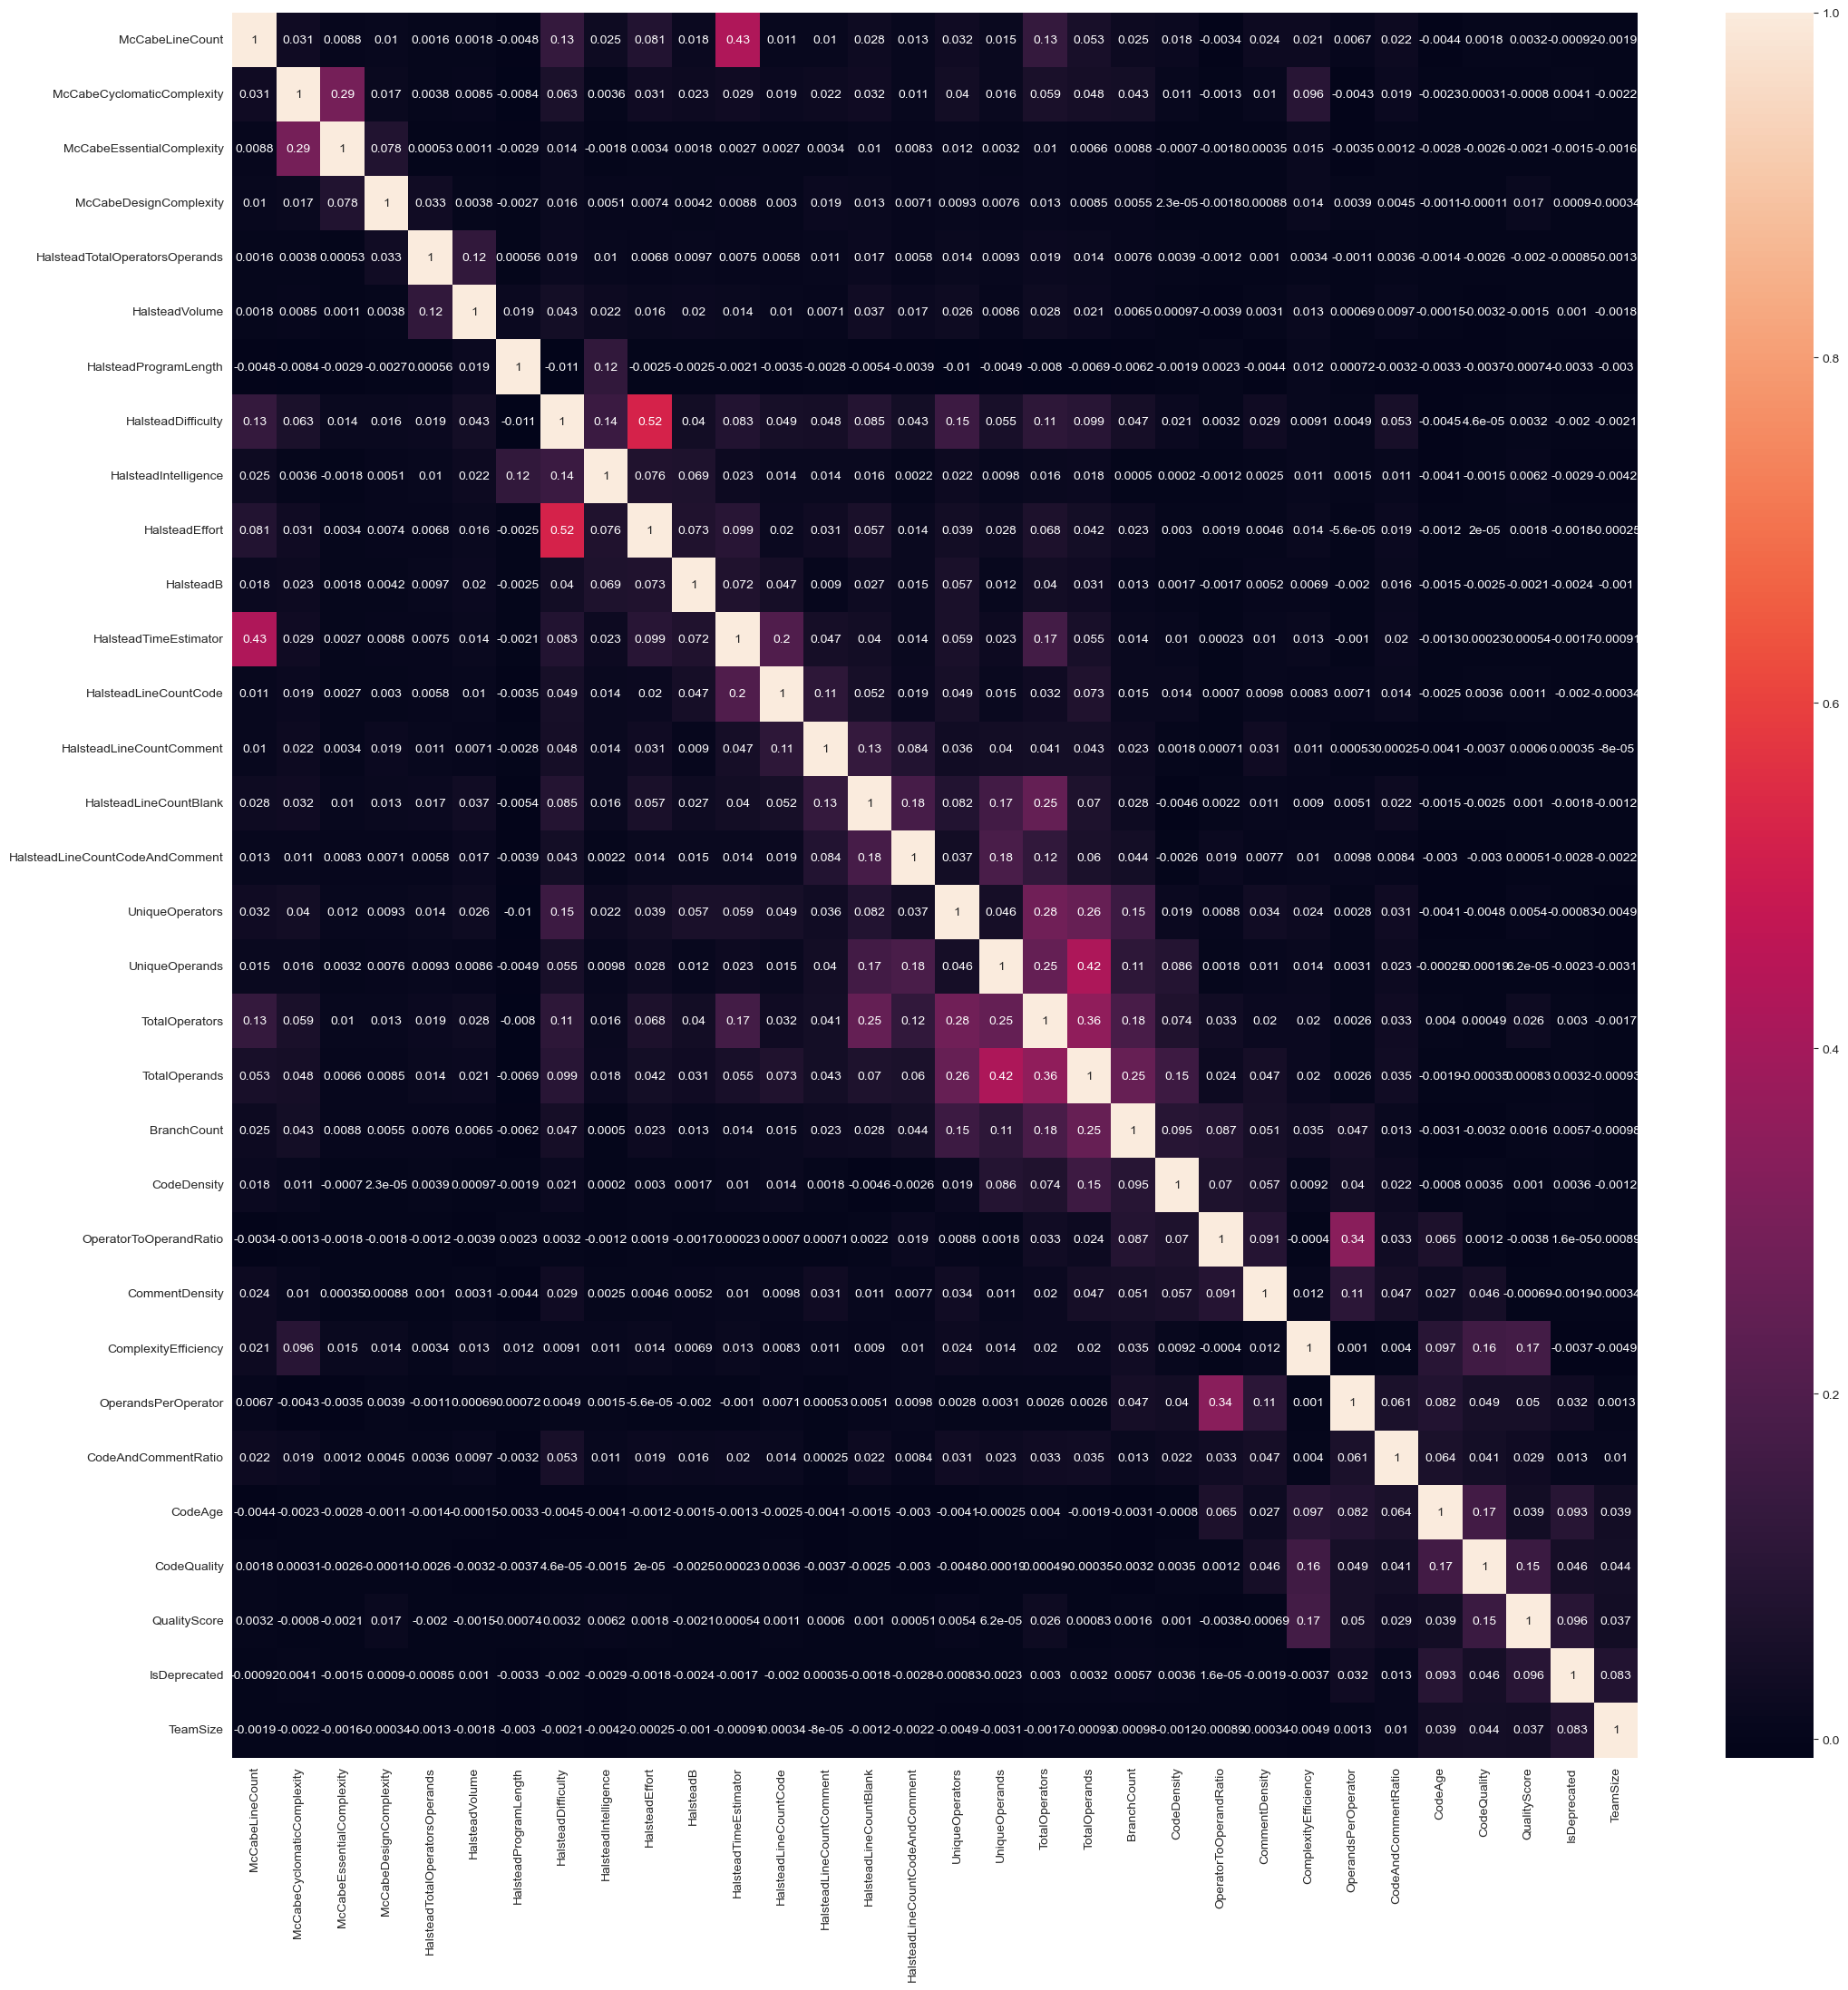

In [38]:
corr = df[numerical_cols].corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True)
plt.show()

<Axes: xlabel='defects', ylabel='count'>

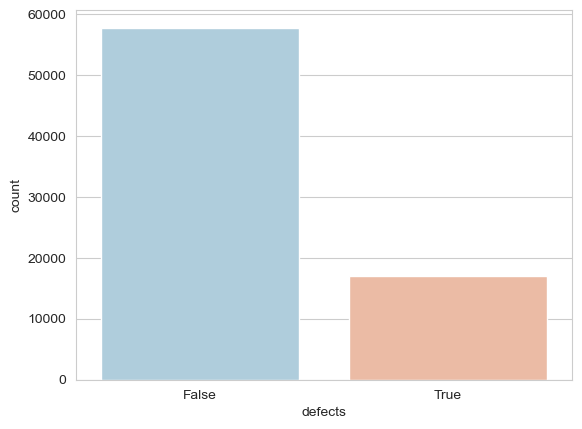

In [14]:
# visualizing label data
sns.set_style("whitegrid")
sns.countplot(x="defects",data=df,palette="RdBu_r")

In [15]:
#replace inf values with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
#imputing missing value in numerical columns which covers integers,unsigned integer,float and complex numbers
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))

In [17]:
# missing values and classes in categorical columns
df[categorical_cols].value_counts(normalize=True)
df[categorical_cols]=df[categorical_cols].replace("nan", np.nan)
df[categorical_cols]=df[categorical_cols].replace("NAN", np.nan)
print([categorical_cols])

[['defects', 'CodeLanguage', 'CodeSizeCategory', 'CodeType']]


In [18]:
# Replace NaN values with mode in each categorical column
for col in categorical_cols:
    mode_val = df[col].mode()[0]  # Calculate mode
    df[col].fillna(mode_val, inplace=True)

In [19]:
df[categorical_cols].value_counts(normalize=True)

defects  CodeLanguage  CodeSizeCategory  CodeType           
False    C++           Large             Web Application        0.023919
         Java          Large             Web Application        0.020590
         Python        Large             Web Application        0.020068
         JavaScript    Large             Web Application        0.019961
         Ruby          Large             Web Application        0.019841
                                                                  ...   
True     JAVASCRIPT    Small             DESKTOP APPLICATION    0.000013
                       Medium            library                0.000013
                                         desktop application    0.000013
                                         WEB APPLICATION        0.000013
         ruby          small             Web Application        0.000013
Name: proportion, Length: 1515, dtype: float64

<Axes: xlabel='CodeSizeCategory', ylabel='count'>

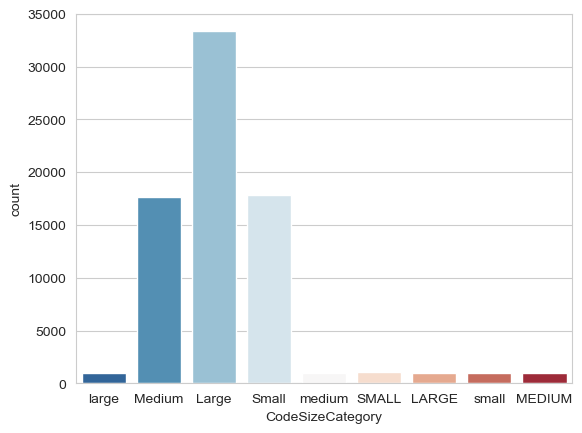

In [20]:
# visualizing label data
sns.set_style("whitegrid")
sns.countplot(x="CodeSizeCategory",data=df,palette="RdBu_r")

<Axes: xlabel='CodeType', ylabel='count'>

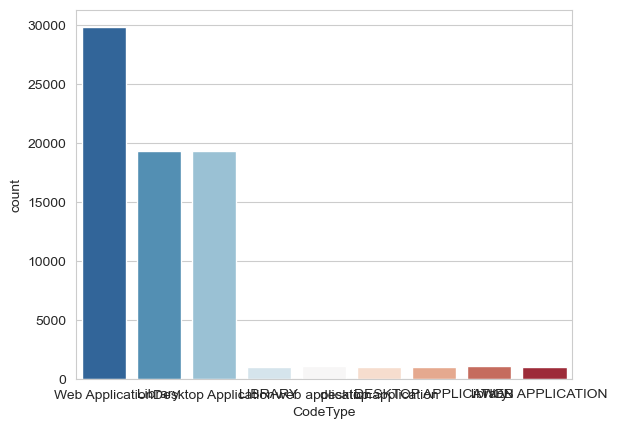

In [21]:
# visualizing label data
sns.set_style("whitegrid")
sns.countplot(x="CodeType",data=df,palette="RdBu_r")

In [22]:
# converting categorical columns into lower case
df['CodeLanguage'] = df['CodeLanguage'].str.lower()
df["CodeSizeCategory"] = df['CodeSizeCategory'].str.lower()
df["CodeType"] = df['CodeType'].str.lower()

<Axes: xlabel='CodeSizeCategory', ylabel='count'>

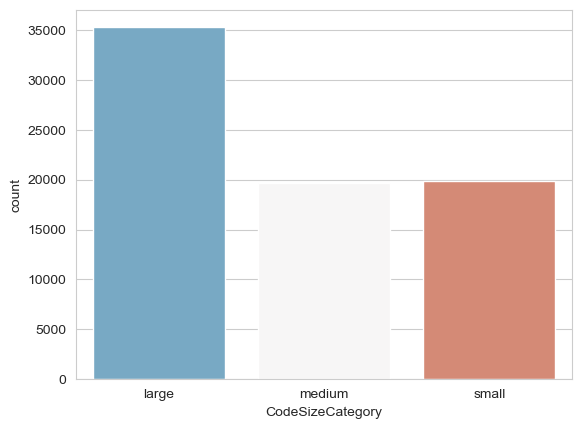

In [23]:
# visualizing label data
sns.set_style("whitegrid")
sns.countplot(x="CodeSizeCategory",data=df,palette="RdBu_r")

<Axes: xlabel='CodeType', ylabel='count'>

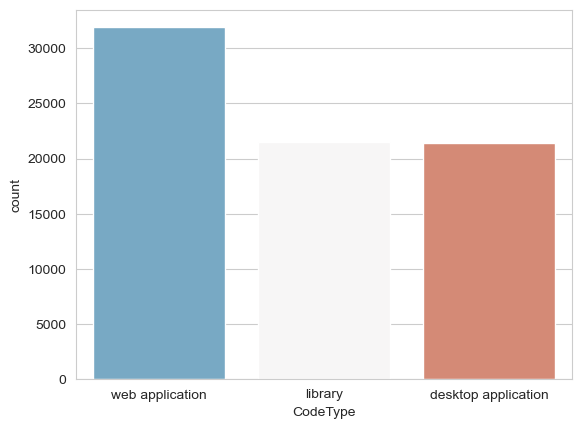

In [24]:
sns.set_style("whitegrid")
sns.countplot(x="CodeType",data=df,palette="RdBu_r")

<Axes: xlabel='CodeLanguage', ylabel='count'>

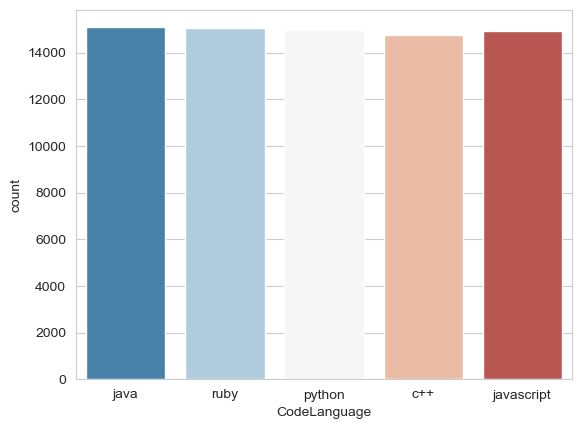

In [25]:
sns.set_style("whitegrid")
sns.countplot(x="CodeLanguage",data=df,palette="RdBu_r")

In [26]:
# encode all categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [27]:
### standard scaler for all numerical columns
from sklearn.preprocessing import StandardScaler
scaled_data=StandardScaler()
for col in numerical_cols:
    df[col] = scaled_data.fit_transform(df[[col]])

In [28]:
df.head()

,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,HalsteadEffort,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,-0.096806,-0.162960,-0.061434,-0.071433,-0.042577,-0.061799,-0.067701,-0.326807,-0.114805,-0.050593,...,-0.231499,-0.077650,-0.161408,1,0,2,-0.312352,-0.255994,-0.035493,-0.127186
1,0.545130,-0.143194,-0.054153,-0.071433,0.076509,0.133703,-0.075464,-0.070870,-0.123781,-0.049674,...,-0.156755,-0.077650,-0.140870,4,1,1,-0.138659,-0.103422,-0.035493,-0.106715
2,-0.096761,-0.162960,-0.061434,-0.067649,-0.041964,-0.060598,-0.070288,-0.282977,-0.118441,-0.050344,...,-0.196572,-0.077650,-0.132654,4,0,0,-0.262726,-0.121350,0.567363,-0.127186
3,-0.096723,-0.153077,-0.061434,-0.063865,-0.041856,-0.058958,-0.070935,-0.278020,-0.117378,-0.050260,...,-0.186199,-0.124772,-0.125808,3,0,0,0.407237,0.638255,-0.186206,-0.065773
4,-0.096806,-0.153077,-0.061434,-0.071433,-0.042361,-0.061352,-0.072229,-0.215405,-0.125297,-0.050503,...,-0.153357,-0.077650,0.067251,3,2,2,0.059849,-0.119490,-0.035493,-0.076008


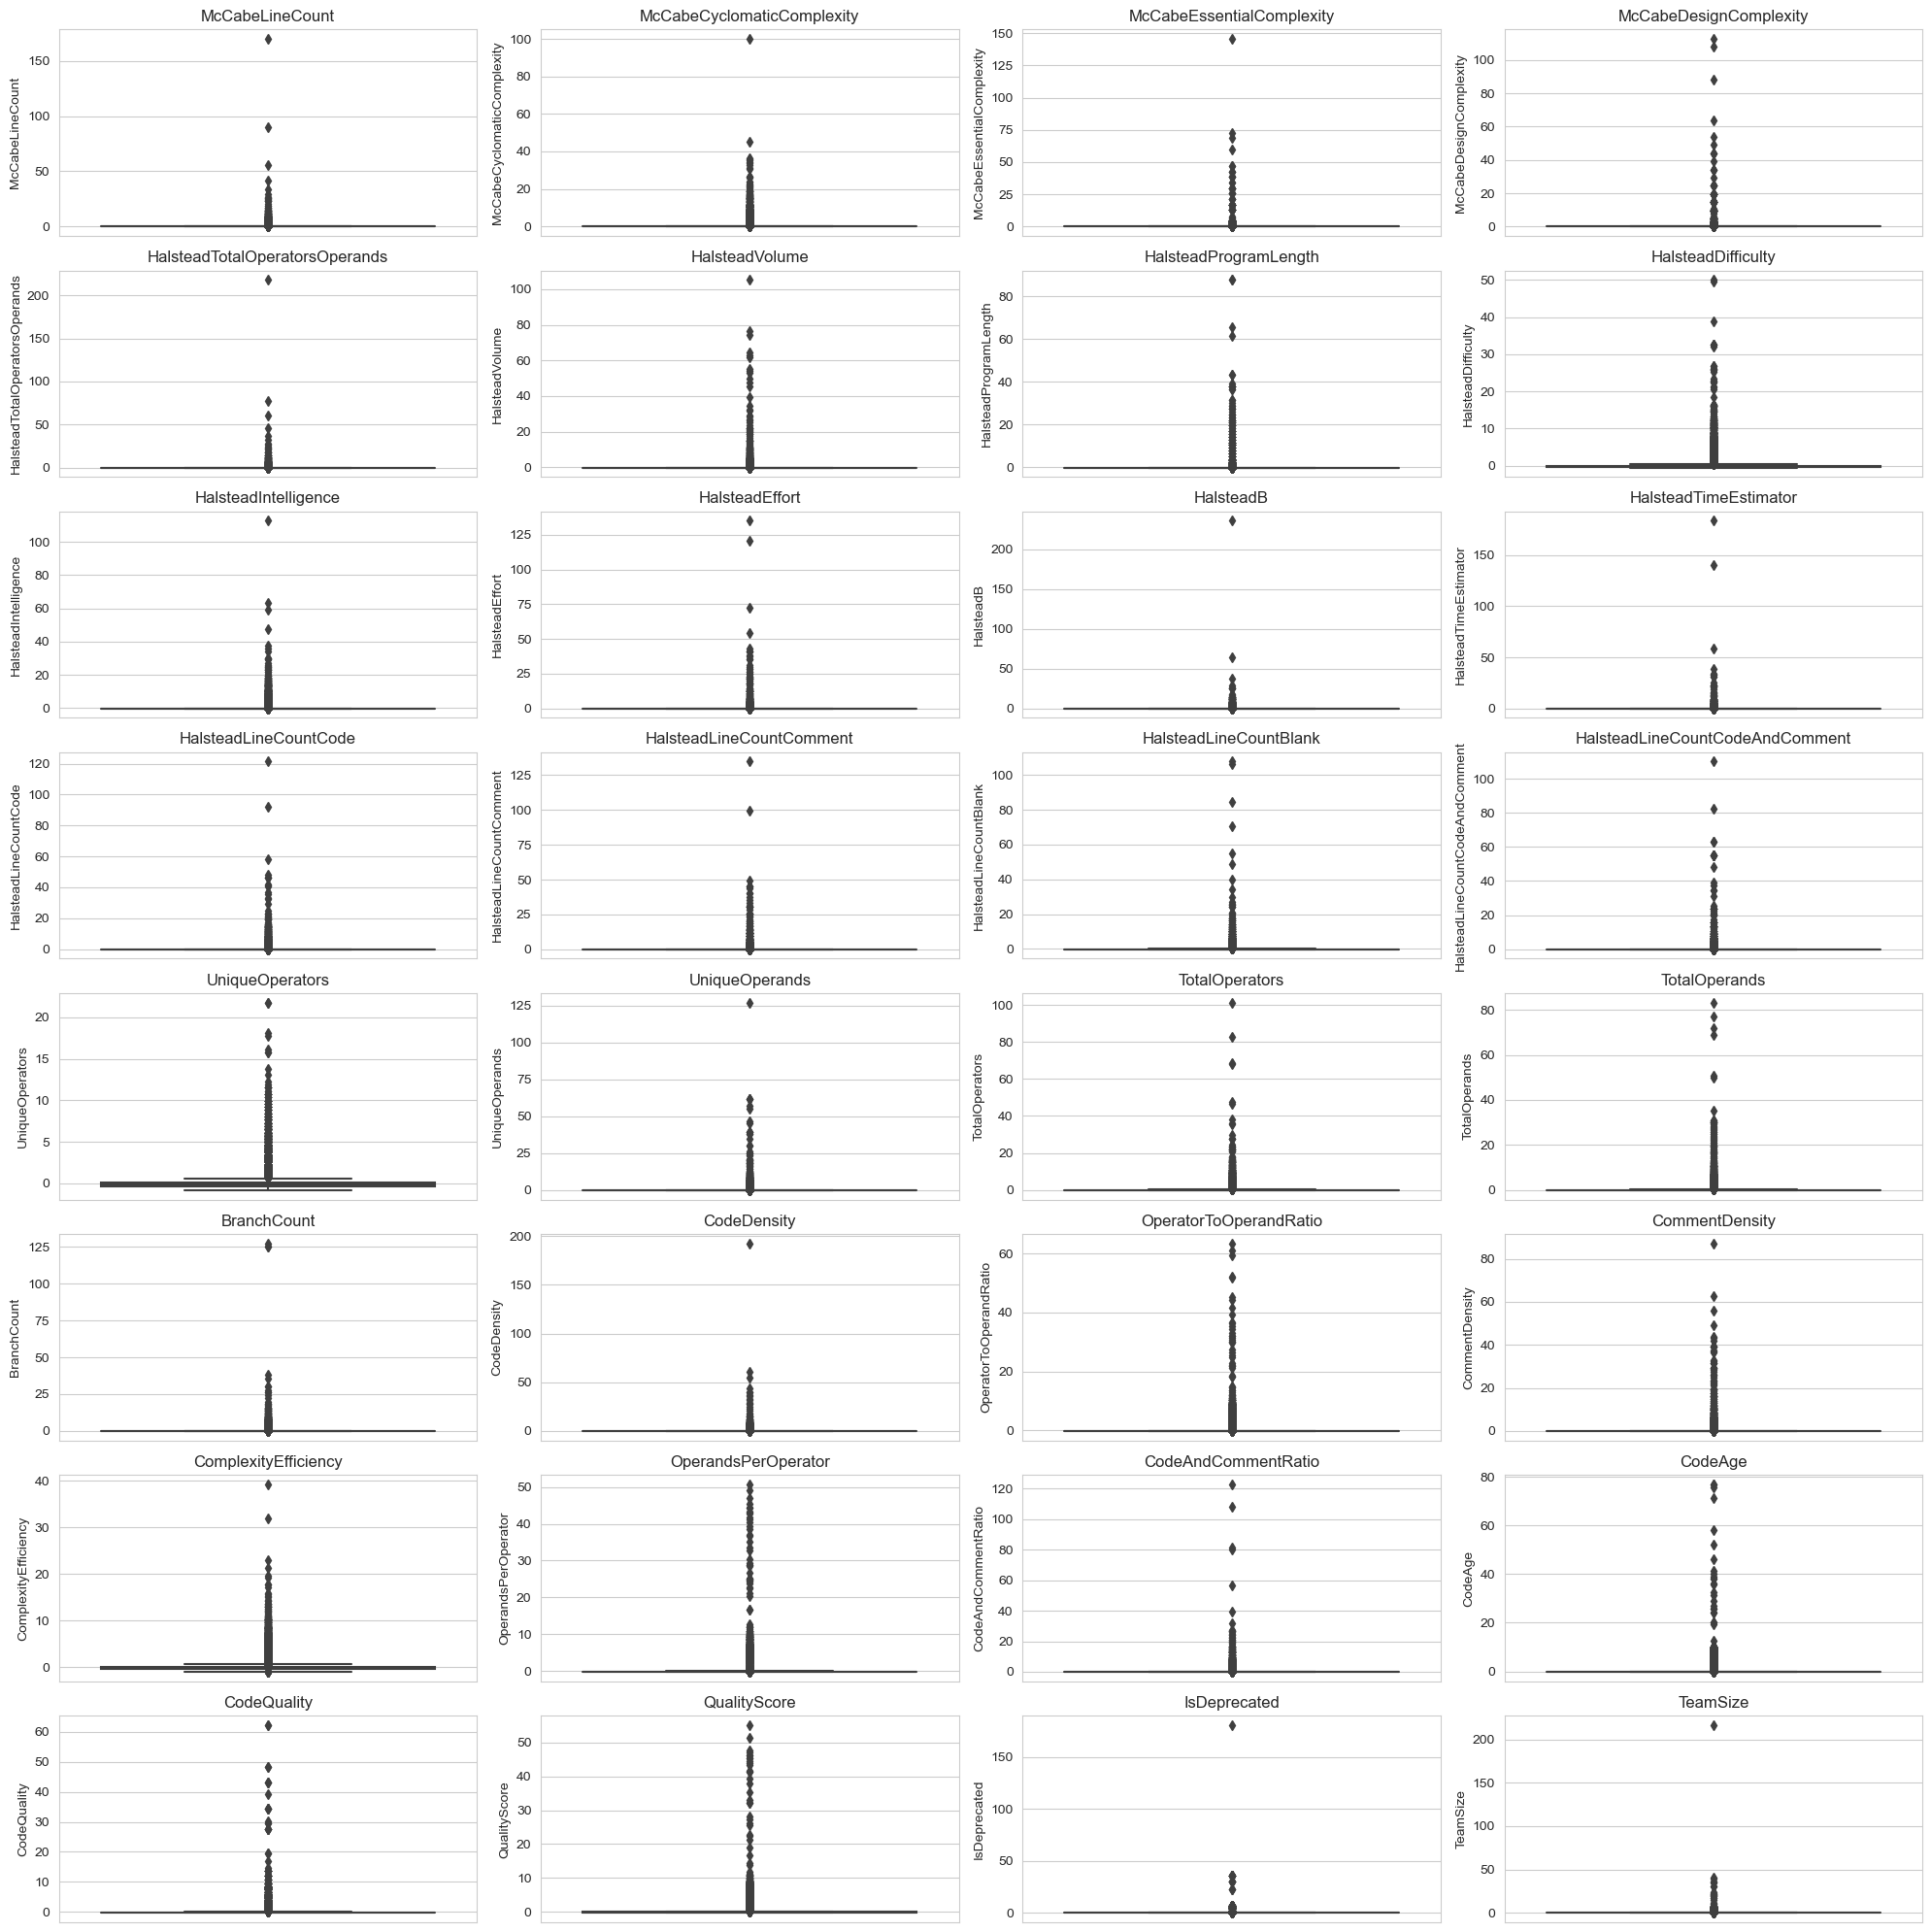

In [29]:
num_cols = len(numerical_cols)
num_rows = (num_cols // 4) + (num_cols % 4 > 0)

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 20))  # Adjust the figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

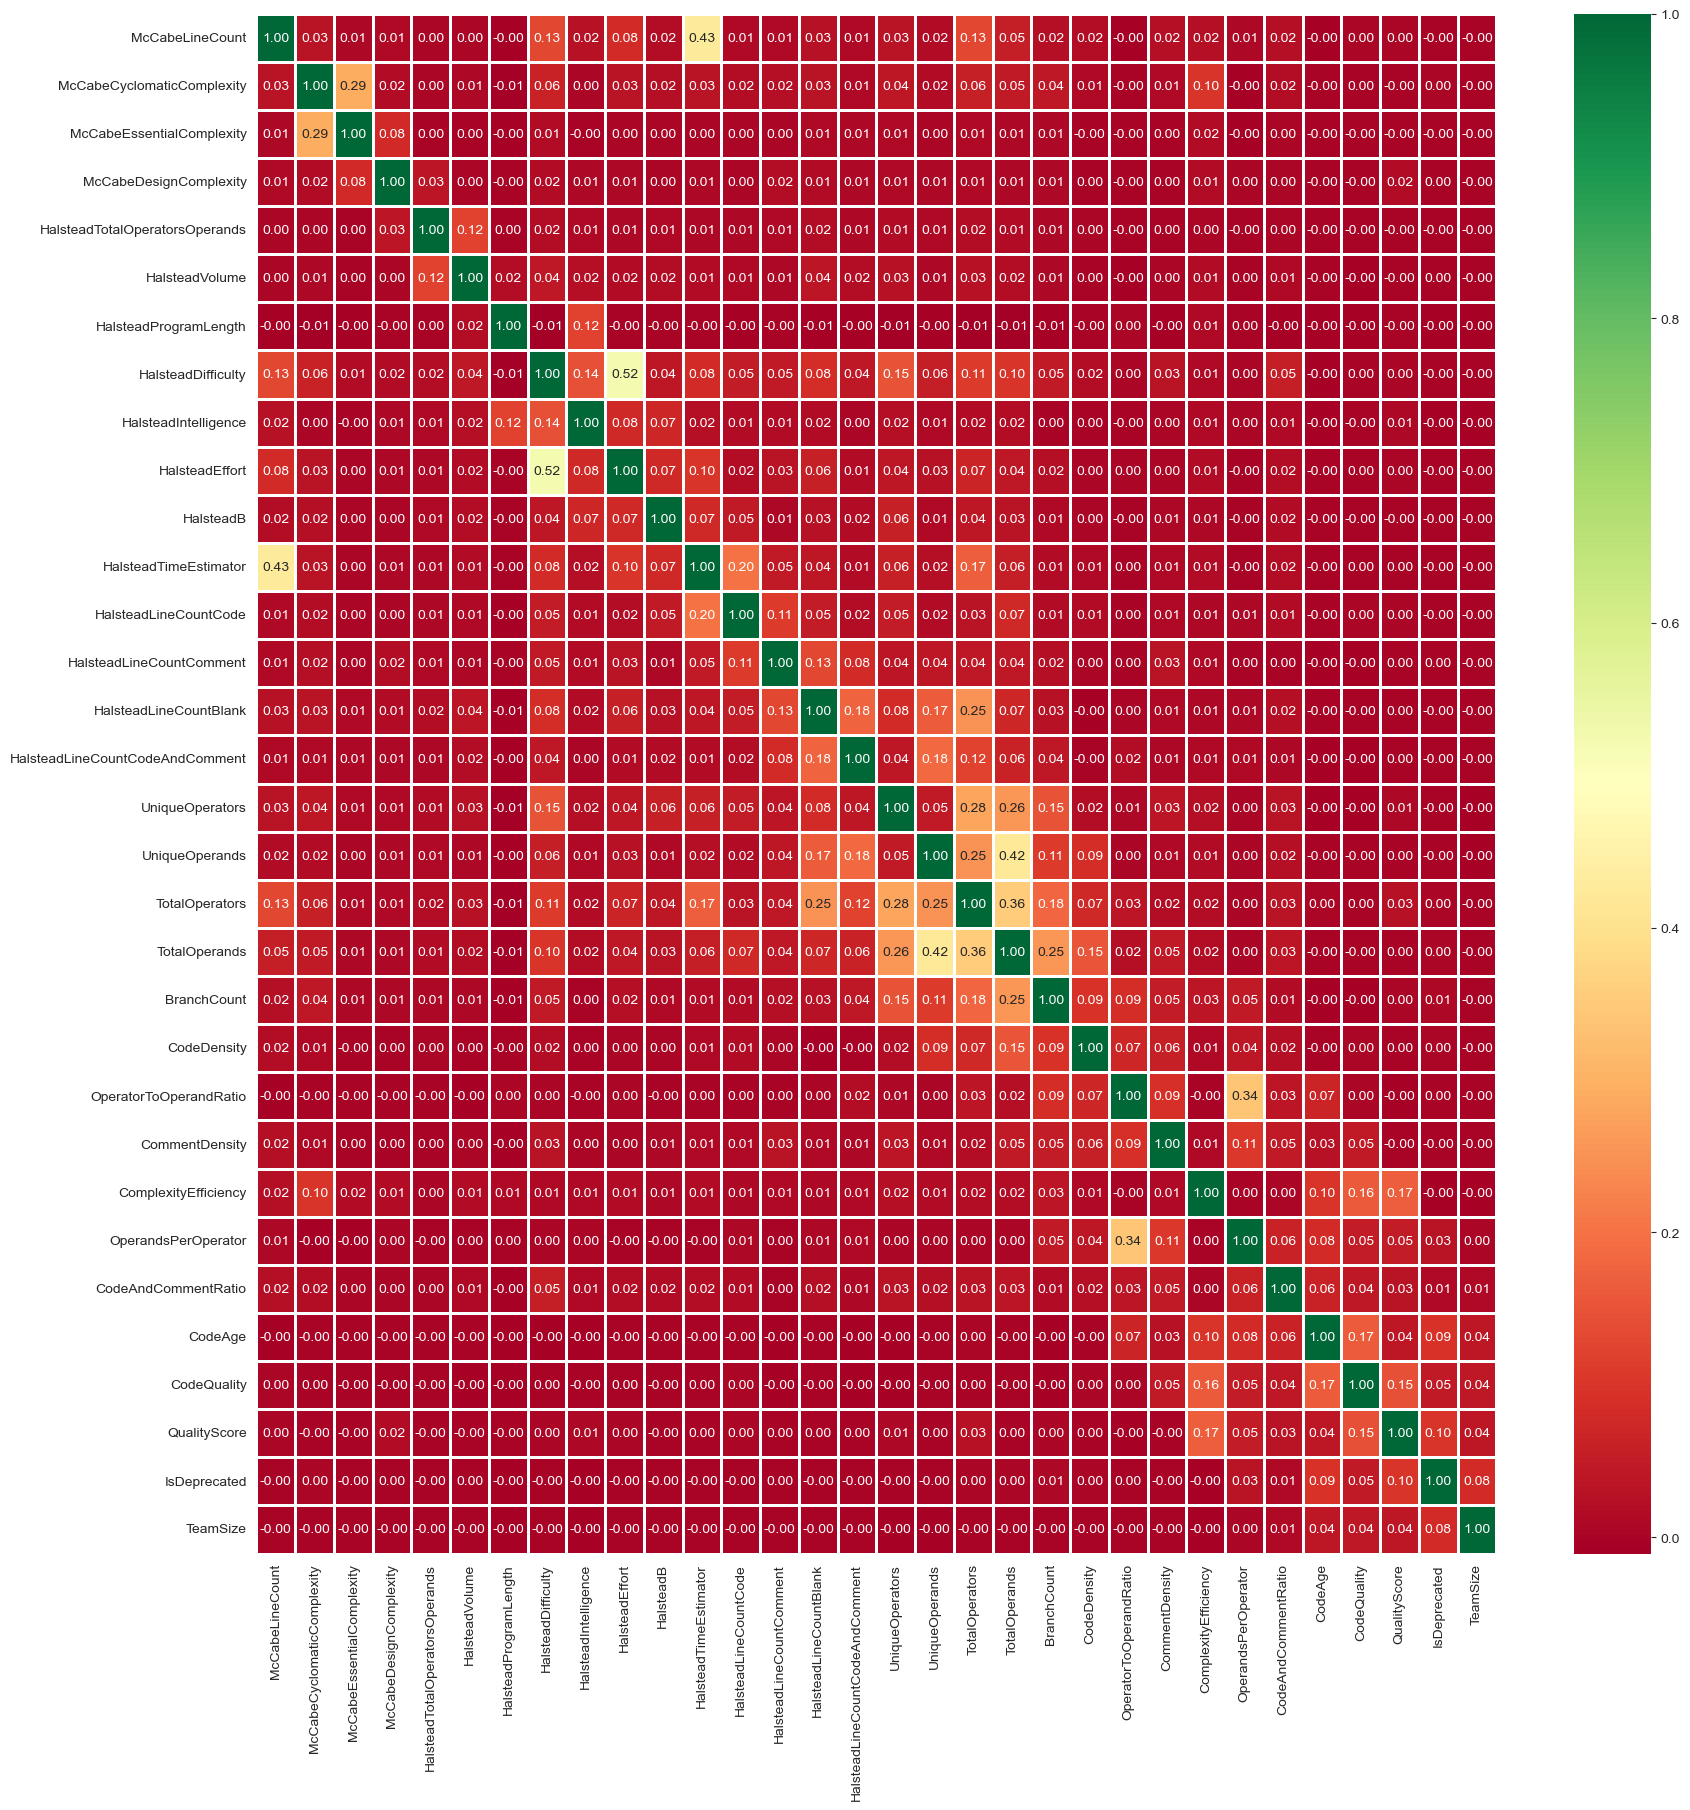

In [30]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[numerical_cols].corr(),annot=True,fmt=".2f",linewidths=1.0,cmap="RdYlGn")
plt.show()

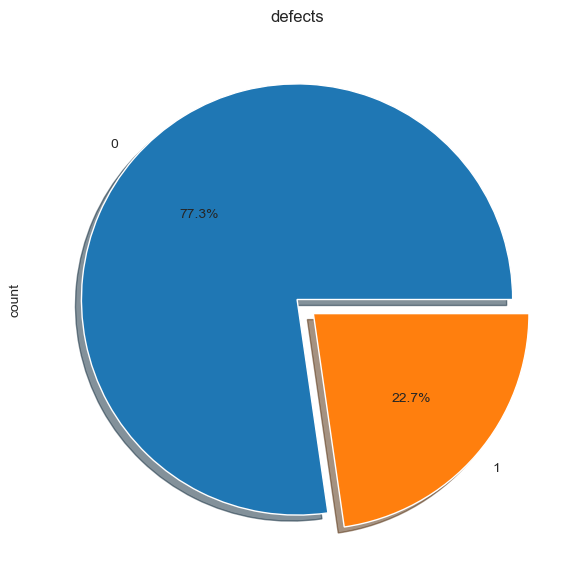

In [39]:
fig, ax = plt.subplots(figsize=(7, 7))
df["defects"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
ax.set_title('defects')
plt.show()

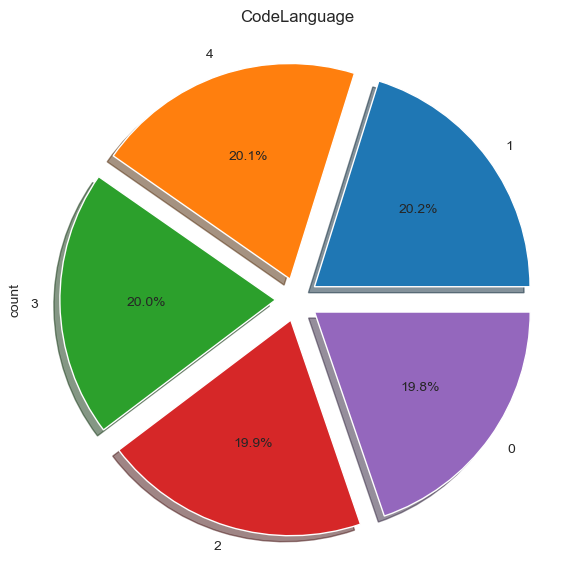

In [40]:
fig, ax = plt.subplots(figsize=(7, 7))
explode = [0.1] * df['CodeLanguage'].nunique()
df['CodeLanguage'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True)
ax.set_title("CodeLanguage")
plt.show()

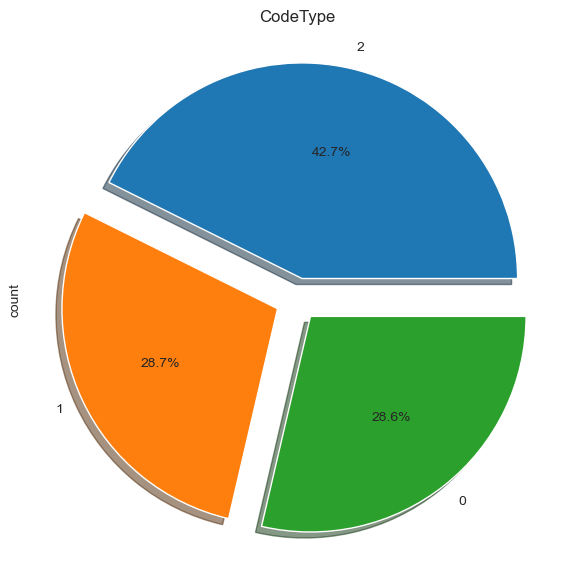

In [41]:
fig, ax = plt.subplots(figsize=(7, 7))
explode = [0.1] * df['CodeType'].nunique()
df['CodeType'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True)
ax.set_title("CodeType")
plt.show()

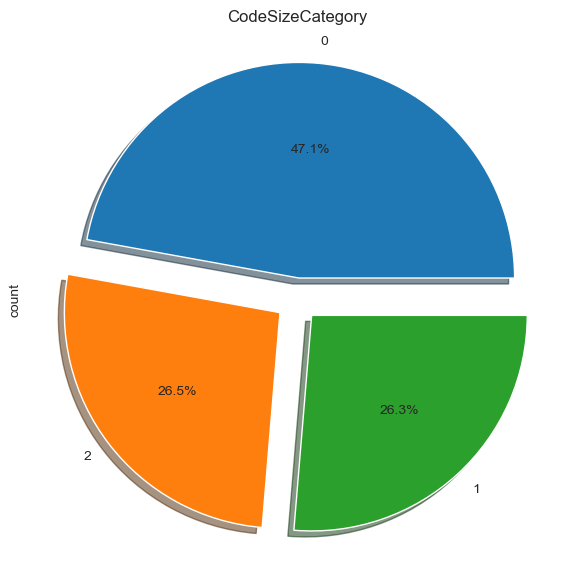

In [42]:
fig, ax = plt.subplots(figsize=(7, 7))
explode = [0.1] * df['CodeSizeCategory'].nunique()
df['CodeSizeCategory'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True)
ax.set_title("CodeSizeCategory")
plt.show()